In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
vehicle_data = pd.read_csv("data/vehicles.csv", index_col=0)
vehicle_data.head()

,vin,manufacturer,year,color,body_type,engine_type,transmission,fuel_type,seating_capacity,kilometers_driven,vehicle_condition_status,selling_price,owner_name,owner_profession,owner_age,owner_district,proposed_purchase_price,purchase_date
0,KNEQQMPI59JQMQFUS,Volkswagen,2023,metallic_black,Truck,electric,manual,gasoline,6,19.84,inactive,5980.16,KARABO Nadege,librarian,49,east_nyagatare,6705.76,2024-01-24
1,Y06254A9NYNT183XI,Audi,2021,matte_black,Convertible,diesel,automatic,hybrid,10,19.83,active,8778.19,UWASE TETA Paola,economist,84,south_kamonyi,10008.46,2016-07-21
2,U8J8TBA70SBBGVXT1,Nissan,2020,metallic_silver,Wagon,petrol,manual,biodiesel,3,78.73,inactive,8921.27,IMANISINGIZWE KAMANA Adeodatus Clare,mechanic,38,kigali_gasabo,10219.33,2022-06-07
3,ZWEG0R44V9S72T8CO,Chevrolet,2012,gray,Van,petrol,automatic,ethanol,6,46.02,inactive,16953.98,IMANISHIMWE Emmanuel,hairdresser,33,west_rusizi,19288.22,2006-03-15
4,XRNFVKZUXQ4WJHJTK,Nissan,2009,purple,Hatchback,petrol,manual,gasoline,10,247.39,active,21727.87,IRASUBIZA Divine,baker,86,east_rwamagana,22848.39,2021-06-14


In [3]:
vehicle_data.describe()

,year,seating_capacity,kilometers_driven,selling_price,owner_age,proposed_purchase_price
count,499746.000000,499746.000000,499746.000000,499746.000000,499746.000000,499746.000000
mean,2011.995770,5.999532,120.362064,17658.561496,59.013005,19425.720447
std,7.204957,2.583512,108.449333,7580.377670,23.933346,8358.384150
min,2000.000000,2.000000,0.000000,4500.000000,18.000000,4725.020000
25%,2006.000000,4.000000,30.730000,10965.082500,38.000000,12256.542500
50%,2012.000000,6.000000,89.290000,17522.420000,59.000000,19302.405000
75%,2018.000000,8.000000,185.150000,23976.257500,80.000000,26363.872500
max,2024.000000,10.000000,479.980000,31899.990000,100.000000,53801.410000


In [4]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499746 entries, 0 to 499745
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   vin                       499746 non-null  object 
 1   manufacturer              499746 non-null  object 
 2   year                      499746 non-null  int64  
 3   color                     499746 non-null  object 
 4   body_type                 499746 non-null  object 
 5   engine_type               499746 non-null  object 
 6   transmission              499746 non-null  object 
 7   fuel_type                 499746 non-null  object 
 8   seating_capacity          499746 non-null  int64  
 9   kilometers_driven         499746 non-null  float64
 10  vehicle_condition_status  499746 non-null  object 
 11  selling_price             499746 non-null  float64
 12  owner_name                499746 non-null  object 
 13  owner_profession          499746 non-null  object

In [5]:
vehicle_data.shape

(499746, 18)

In [6]:
vehicle_data.columns.tolist()

['vin',
 'manufacturer',
 'year',
 'color',
 'body_type',
 'engine_type',
 'transmission',
 'fuel_type',
 'seating_capacity',
 'kilometers_driven',
 'vehicle_condition_status',
 'selling_price',
 'owner_name',
 'owner_profession',
 'owner_age',
 'owner_district',
 'proposed_purchase_price',
 'purchase_date']

In [7]:
vehicle_data.nunique()

vin                         499746
manufacturer                    10
year                            25
color                           23
body_type                        8
engine_type                      3
transmission                     2
fuel_type                        7
seating_capacity                 9
kilometers_driven            44561
vehicle_condition_status         2
selling_price               356474
owner_name                     139
owner_profession                89
owner_age                       83
owner_district                  30
proposed_purchase_price     458928
purchase_date                 8400
dtype: int64

In [8]:
for col in vehicle_data.columns:
    print(vehicle_data[col].value_counts())

vin
KNEQQMPI59JQMQFUS    1
LI0OA4X2YTWYSXGEF    1
CRZTNT7KHWZ0JTBP3    1
B24LVZCB1VAPC79I9    1
IZLZMOEAFFLEDCJ0B    1
                    ..
FBDKL10ZNKCADT0OV    1
CLQUVCHMXOJBZ62EZ    1
E1QKMHWMP59JP8443    1
X40ZXPHUU6469XA8I    1
K1YXRQOWFRG2M351R    1
Name: count, Length: 499746, dtype: int64
manufacturer
Audi          50272
Honda         50244
Chevrolet     50138
Ford          50138
Mercedes      49925
Nissan        49880
Hyundai       49876
BMW           49817
Toyota        49755
Volkswagen    49701
Name: count, dtype: int64
year
2016    20365
2008    20285
2018    20101
2001    20094
2014    20082
2017    20055
2015    20052
2023    20043
2006    20015
2010    20013
2003    19990
2002    19989
2011    19979
2004    19974
2013    19971
2021    19949
2022    19928
2012    19922
2000    19921
2009    19888
2007    19860
2019    19857
2005    19838
2020    19799
2024    19776
Name: count, dtype: int64
color
matte_black        21959
gray               21879
metallic_silver    21867


In [9]:
vehicle_data.dtypes

vin                          object
manufacturer                 object
year                          int64
color                        object
body_type                    object
engine_type                  object
transmission                 object
fuel_type                    object
seating_capacity              int64
kilometers_driven           float64
vehicle_condition_status     object
selling_price               float64
owner_name                   object
owner_profession             object
owner_age                     int64
owner_district               object
proposed_purchase_price     float64
purchase_date                object
dtype: object

In [10]:
categorical_columns = vehicle_data.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    unique_values = vehicle_data[col].unique()
    print(f"{col}: {len(unique_values)}")

vin: 499746
manufacturer: 10
color: 23
body_type: 8
engine_type: 3
transmission: 2
fuel_type: 7
vehicle_condition_status: 2
owner_name: 139
owner_profession: 89
owner_district: 30
purchase_date: 8400


In [11]:
vehicle_data.isnull().sum()

vin                         0
manufacturer                0
year                        0
color                       0
body_type                   0
engine_type                 0
transmission                0
fuel_type                   0
seating_capacity            0
kilometers_driven           0
vehicle_condition_status    0
selling_price               0
owner_name                  0
owner_profession            0
owner_age                   0
owner_district              0
proposed_purchase_price     0
purchase_date               0
dtype: int64

In [12]:
vehicle_data.drop(["owner_name", "vin"], axis=1, inplace=True)

In [13]:
vehicle_data["purchase_date"] = pd.to_datetime(vehicle_data["purchase_date"], errors="coerce")
vehicle_data.dtypes

manufacturer                        object
year                                 int64
color                               object
body_type                           object
engine_type                         object
transmission                        object
fuel_type                           object
seating_capacity                     int64
kilometers_driven                  float64
vehicle_condition_status            object
selling_price                      float64
owner_profession                    object
owner_age                            int64
owner_district                      object
proposed_purchase_price            float64
purchase_date               datetime64[ns]
dtype: object

In [14]:
sns.set_theme(rc={ #rc stands for "runtime configuration".  This sets the default figure size for Seaborn plots to 20x20 inches.
    'figure.figsize': (20, 20),        # Set figure size to 10x6 inches
    'font.size': 14,                   # Set default font size to 14
    'axes.titlesize': 16,              # Set axes title font size to 16
    'xtick.labelsize': 12,             # Set x-tick label font size to 12
    'ytick.labelsize': 12,             # Set y-tick label font size to 12
    'lines.linewidth': 2,              # Set default line width to 2
    'axes.labelsize': 14               # Set axes label font size to 14
})

%matplotlib inline
#This is a magic command used in Jupyter notebooks that allows you to display Matplotlib plots inline,
#directly below the code cells that produce them.
#It ensures that your plots are rendered within the notebook rather than in a separate window

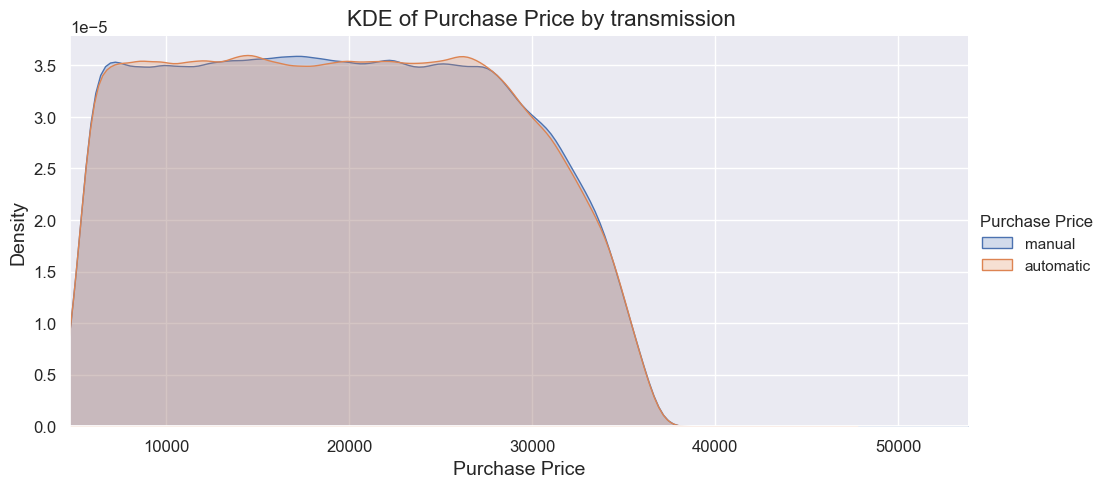

In [15]:
# A stacked KDE plot is a type of data visualization that combines multiple Kernel Density Estimate (KDE) plots into a single graph,
# where each KDE is stacked on top of the others.
# This allows for easy comparison of the distributions of different groups within a dataset.
g = sns.FacetGrid(vehicle_data, hue='transmission', height=5, aspect=2, xlim=(vehicle_data["proposed_purchase_price"].min(),vehicle_data["proposed_purchase_price"].max())) #
# Map the KDE plot
g.map(sns.kdeplot, 'proposed_purchase_price', fill=True)
g.add_legend(title='Purchase Price')
g.set_axis_labels('Purchase Price', 'Density')
g.figure.suptitle('KDE of Purchase Price by transmission', fontsize=16)
plt.show()

In [16]:
transposed = vehicle_data.head().T
transposed

,0,1,2,3,4
manufacturer,Volkswagen,Audi,Nissan,Chevrolet,Nissan
year,2023,2021,2020,2012,2009
color,metallic_black,matte_black,metallic_silver,gray,purple
body_type,Truck,Convertible,Wagon,Van,Hatchback
engine_type,electric,diesel,petrol,petrol,petrol
transmission,manual,automatic,manual,automatic,manual
fuel_type,gasoline,hybrid,biodiesel,ethanol,gasoline
seating_capacity,6,10,3,6,10
kilometers_driven,19.84,19.83,78.73,46.02,247.39
vehicle_condition_status,inactive,active,inactive,inactive,active


In [17]:
vehicle_data["purchase_date"].head(10)

0   2024-01-24
1   2016-07-21
2   2022-06-07
3   2006-03-15
4   2021-06-14
5   2009-10-13
6   2004-12-20
7   2021-05-17
8   2001-09-03
9   2018-01-06
Name: purchase_date, dtype: datetime64[ns]

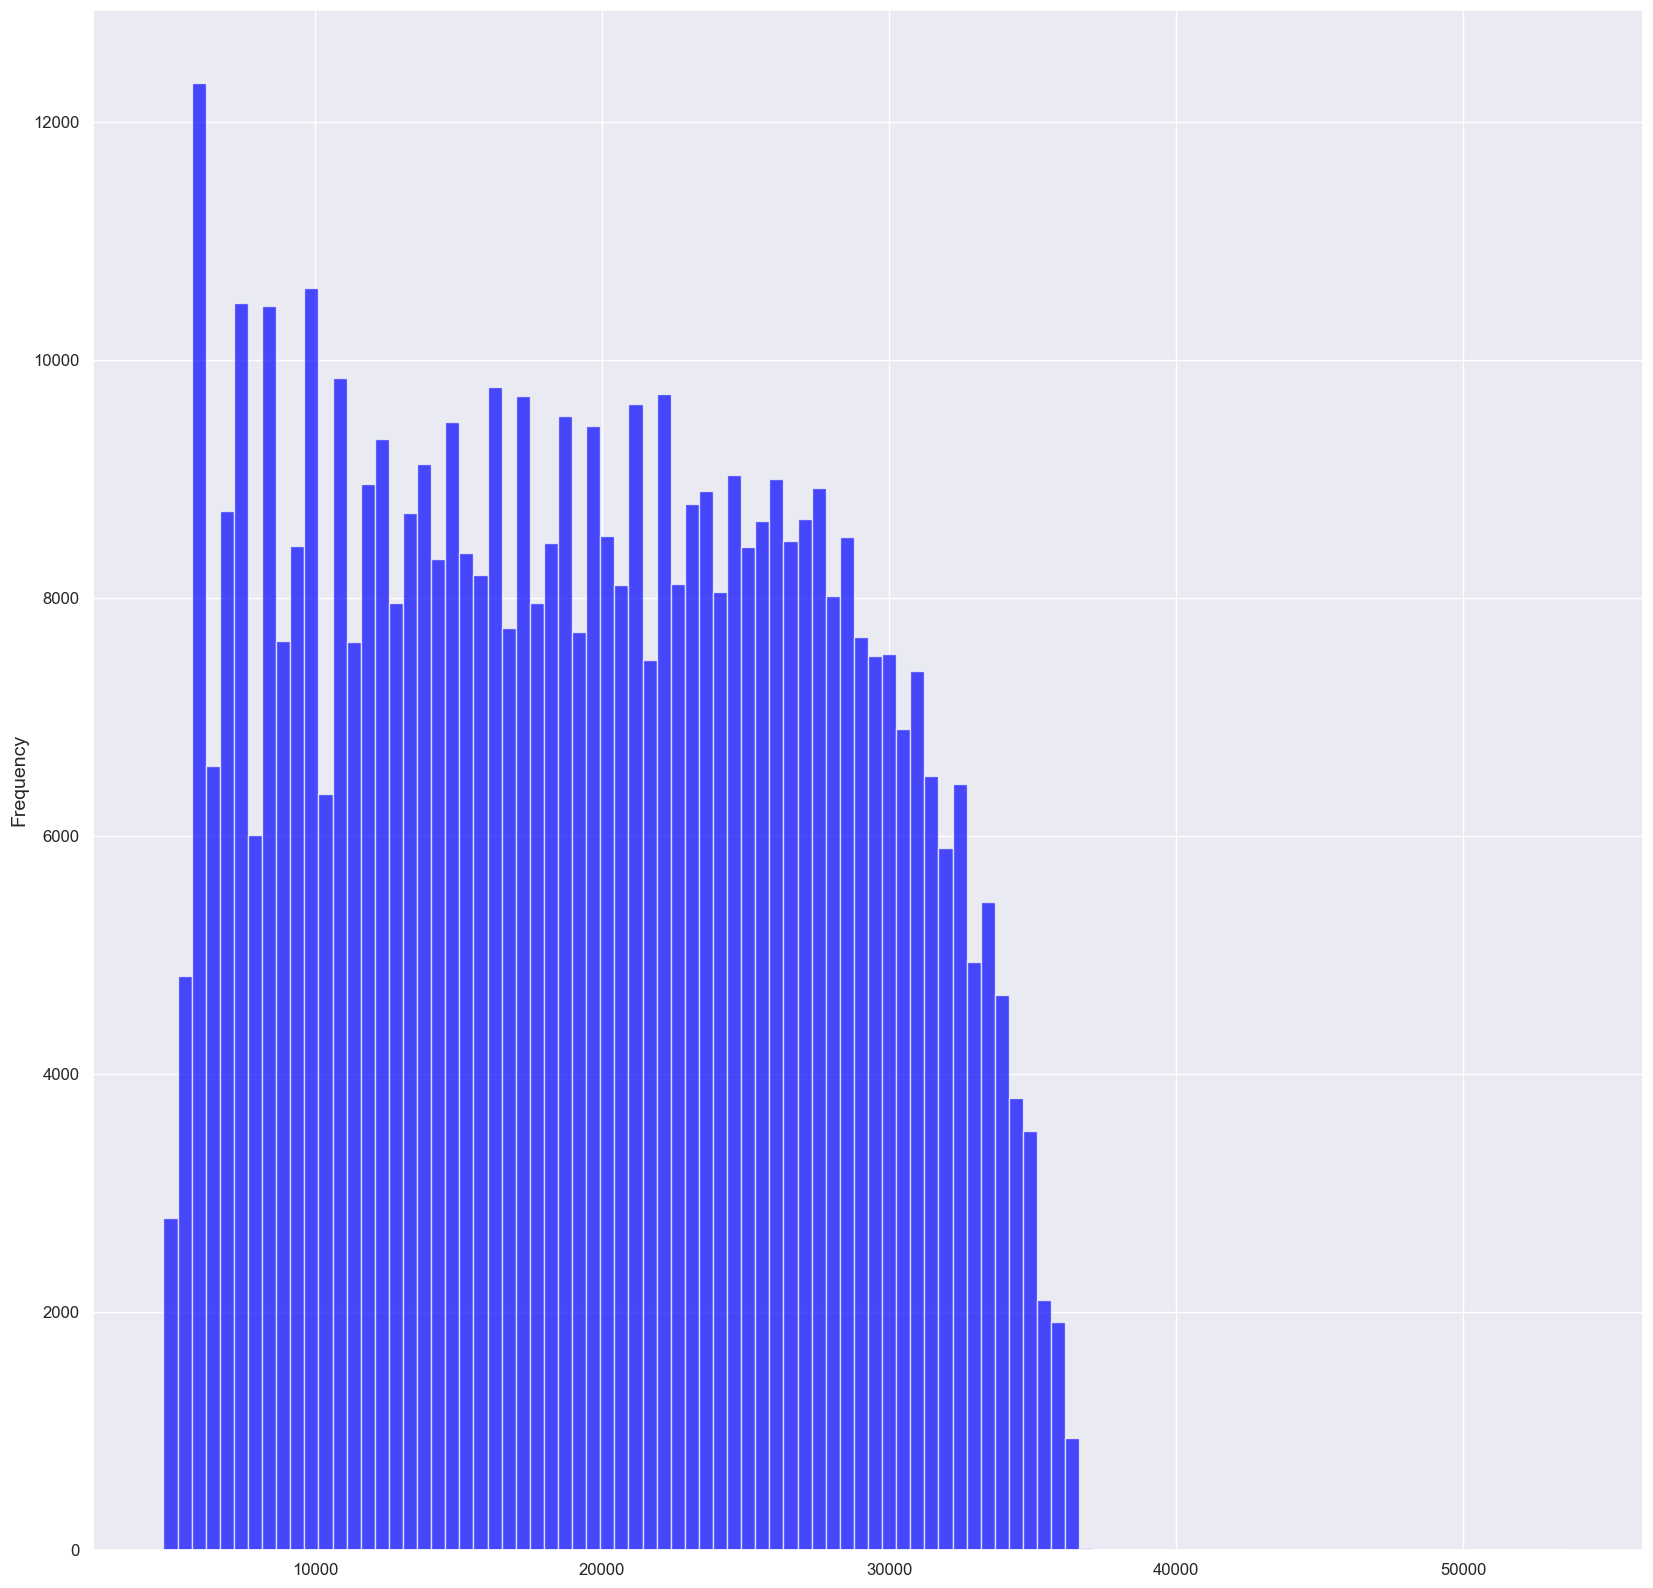

In [18]:
vehicle_data["proposed_purchase_price"].plot.hist(bins=100, alpha=0.7, color="blue")
plt.show()

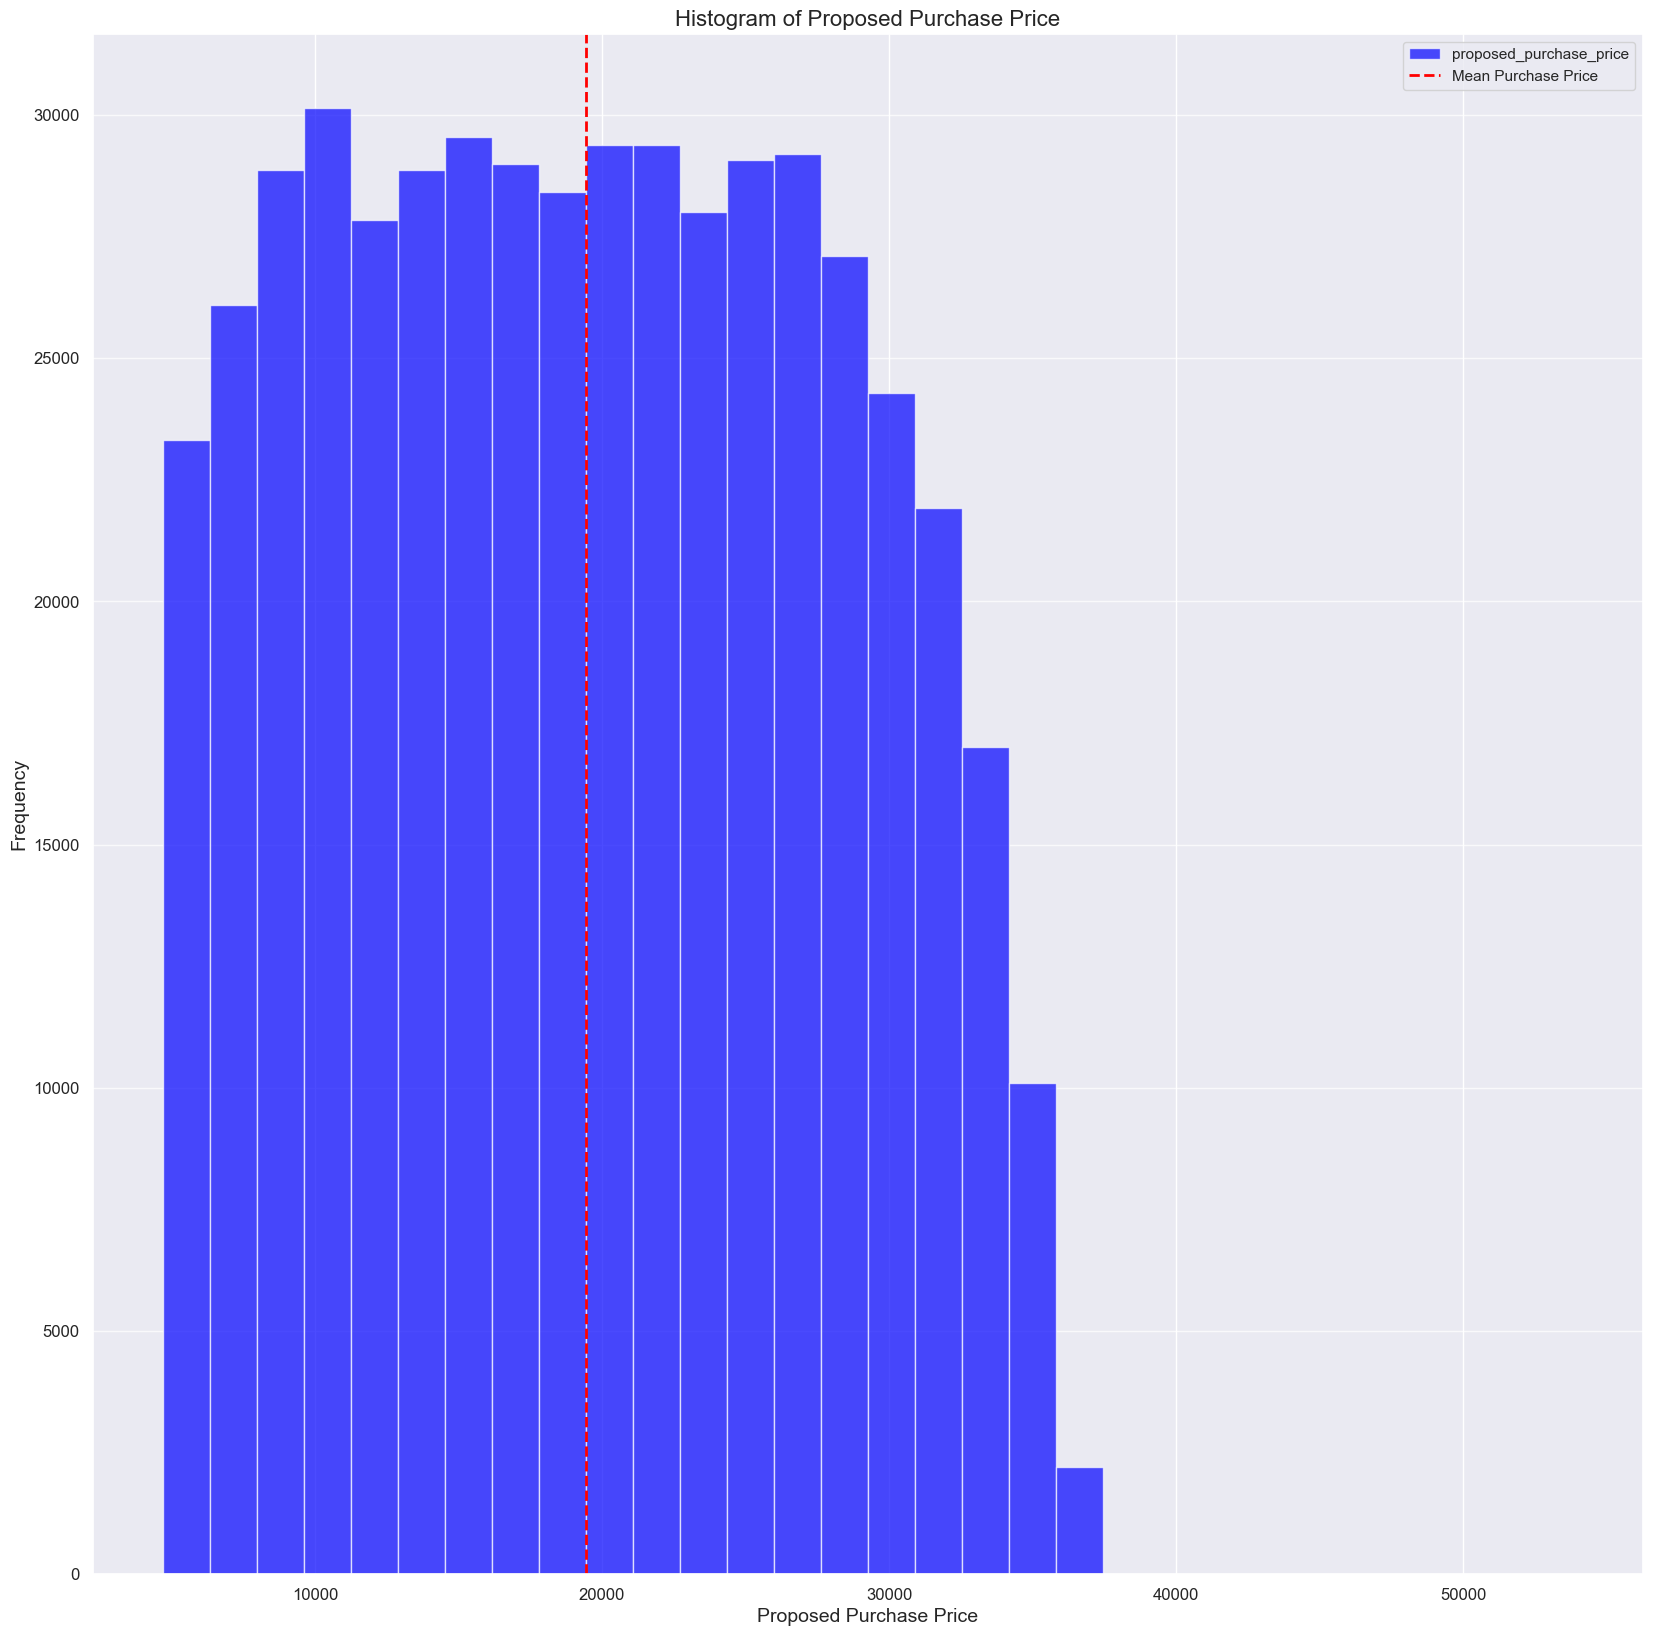

In [19]:
ax = vehicle_data["proposed_purchase_price"].plot.hist(bins=30, alpha=0.7, color="blue")

mean_price = vehicle_data["proposed_purchase_price"].mean()

plt.axvline(mean_price, color="red", linestyle="dashed", linewidth=2, label="Mean Purchase Price")

plt.title("Histogram of Proposed Purchase Price", fontsize=16)
plt.xlabel("Proposed Purchase Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.grid(axis="y", alpha=0.75),

plt.legend()

plt.show()

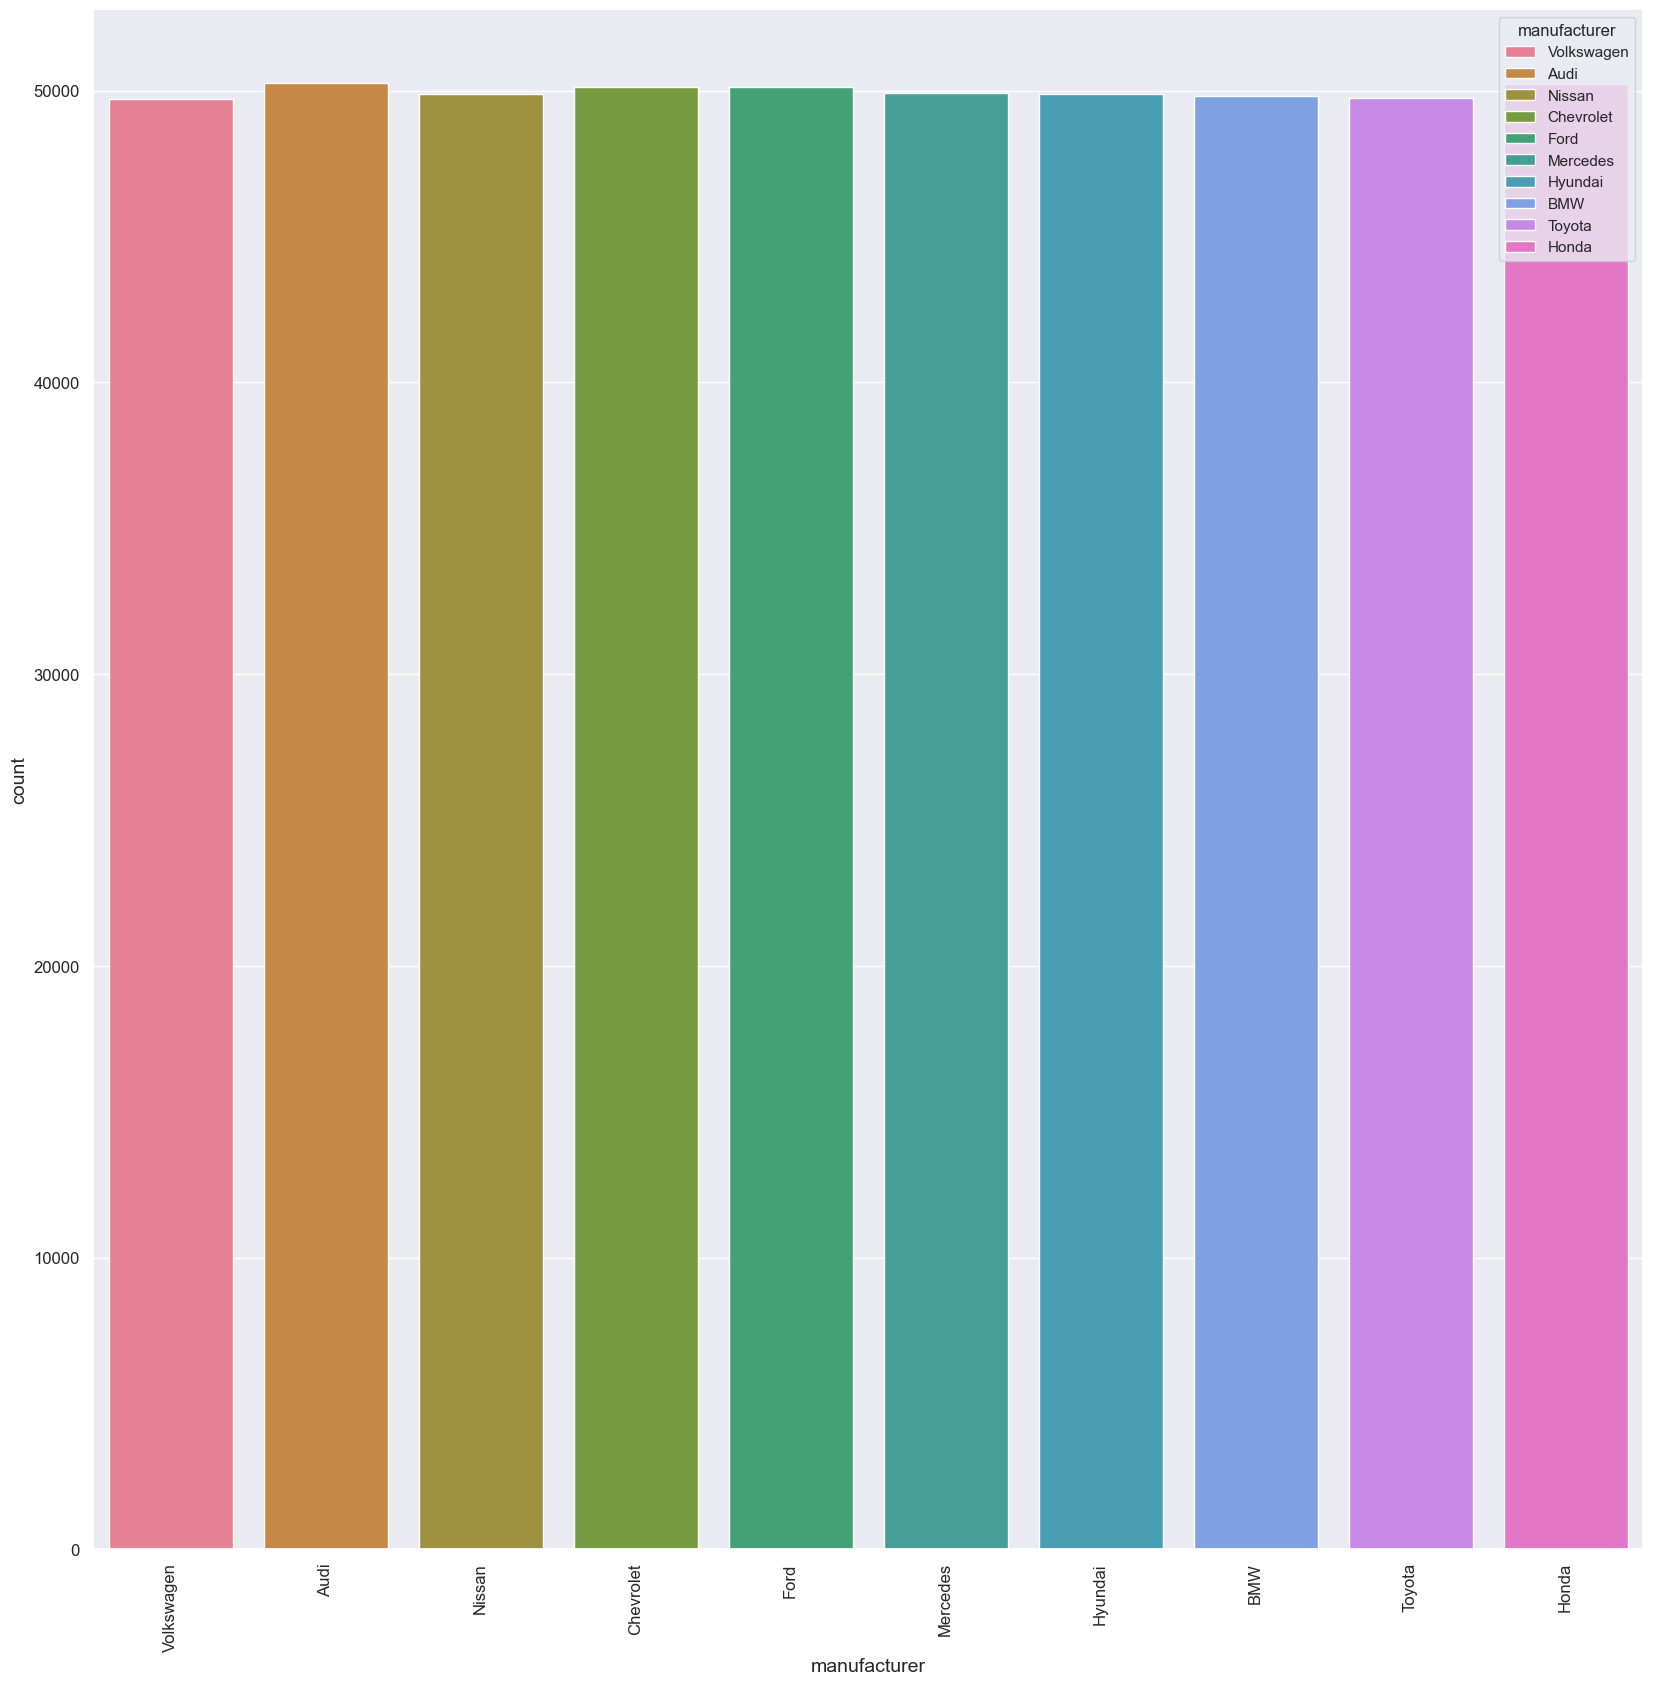

In [20]:
sns.countplot(x="manufacturer", data=vehicle_data, hue="manufacturer", palette="husl", legend=True)
plt.xticks(rotation=90)
plt.show()

In [21]:
vehicle_data[(vehicle_data["year"] > 2020) & (vehicle_data["manufacturer"] == "Audi")]

,manufacturer,year,color,body_type,engine_type,transmission,fuel_type,seating_capacity,kilometers_driven,vehicle_condition_status,selling_price,owner_profession,owner_age,owner_district,proposed_purchase_price,purchase_date
1,Audi,2021,matte_black,Convertible,diesel,automatic,hybrid,10,19.83,active,8778.19,economist,84,south_kamonyi,10008.46,2016-07-21
10,Audi,2023,white,Sedan,diesel,automatic,ethanol,5,13.14,inactive,5986.86,barber,41,north_burera,6811.80,2004-04-07
85,Audi,2024,blue,Wagon,petrol,automatic,ethanol,6,0.00,inactive,5000.00,physician,47,east_bugesera,5275.05,2010-07-17
89,Audi,2021,green,Coupe,electric,manual,electric,6,40.90,active,8755.01,driver,79,south_gisagara,9525.97,2014-09-01
91,Audi,2024,brown,Hatchback,petrol,automatic,electric,5,0.00,active,5000.00,accountant,35,south_ruhango,5542.06,2012-12-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499393,Audi,2023,metallic_brown,SUV,electric,automatic,biodiesel,2,11.20,active,5389.92,pharmacist,22,south_nyaruguru,6060.98,2003-10-03
499649,Audi,2021,metallic_gray,Coupe,petrol,automatic,electric,4,32.79,inactive,7967.21,pharmacist,34,kigali_gasabo,8697.87,2017-09-10
499673,Audi,2024,orange,SUV,petrol,manual,hydrogen,2,0.00,inactive,4500.00,doctor,26,west_rutsiro,4978.79,2010-05-21
499677,Audi,2022,metallic_red,Coupe,diesel,manual,electric,8,39.80,inactive,7656.22,other,60,south_gisagara,8379.27,2001-04-28


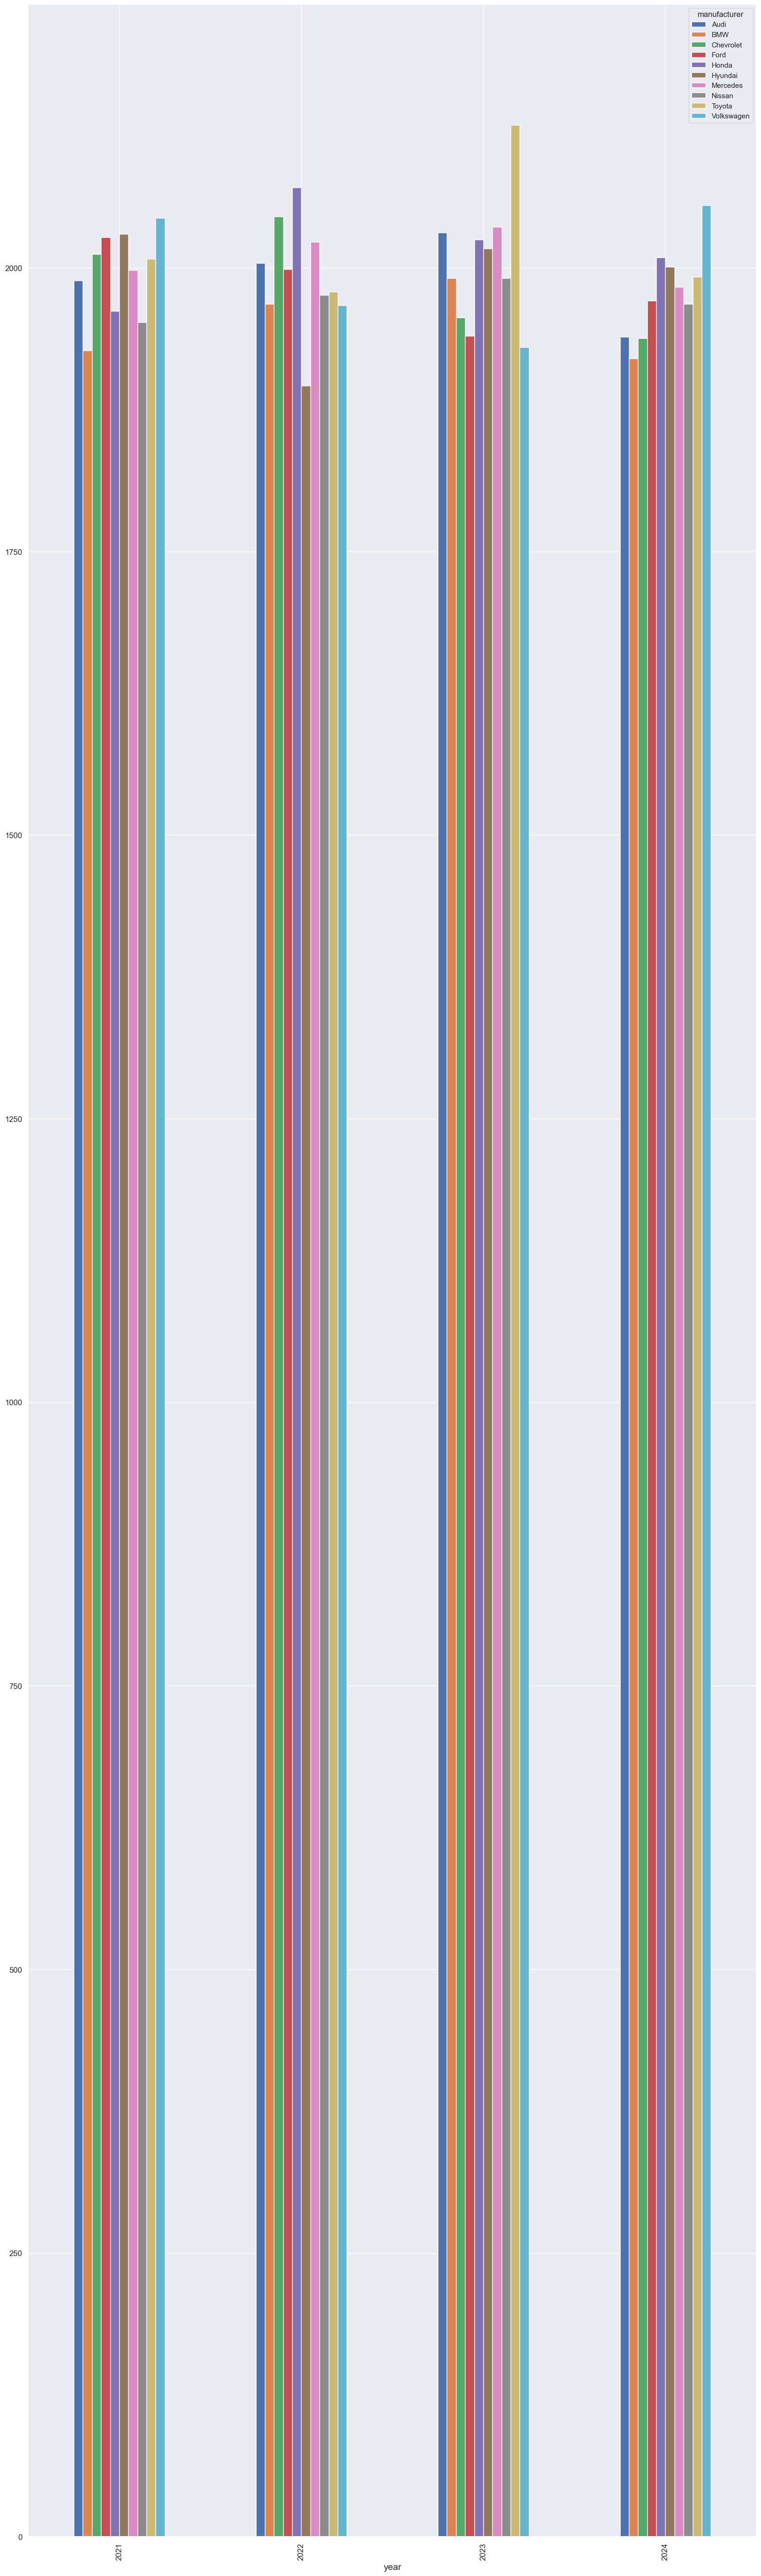

In [22]:
data_crosstab = vehicle_data[vehicle_data["year"] > 2020]
ax=pd.crosstab(data_crosstab.year, data_crosstab.manufacturer).plot(kind="bar", figsize= (20,70));
plt.show()

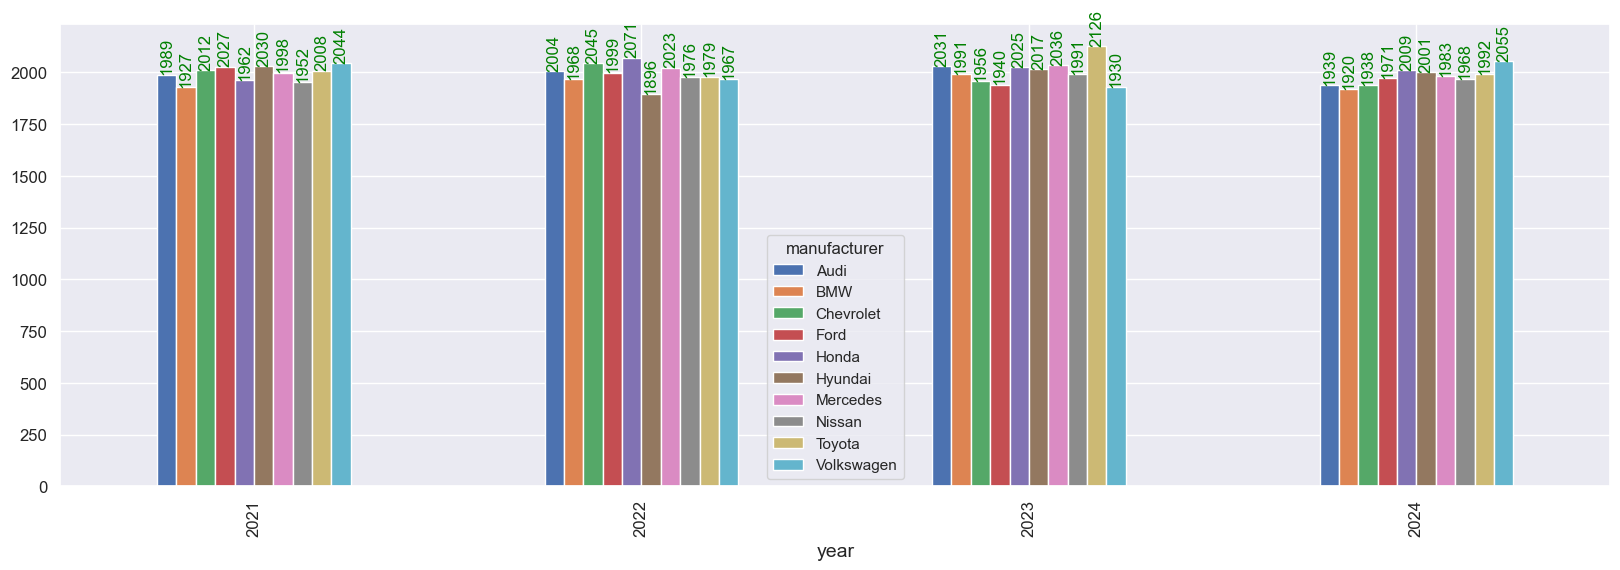

In [23]:
plot2 = pd.crosstab(data_crosstab.year, data_crosstab.manufacturer).plot(kind="bar", figsize=(20, 6))

for p in plot2.patches:
    count = int(p.get_height())
    plot2.annotate(f"{count}", (p.get_x() + p.get_width() / 2, count), ha="center", va="bottom", fontsize=12, rotation=90, color="green")

plt.show()

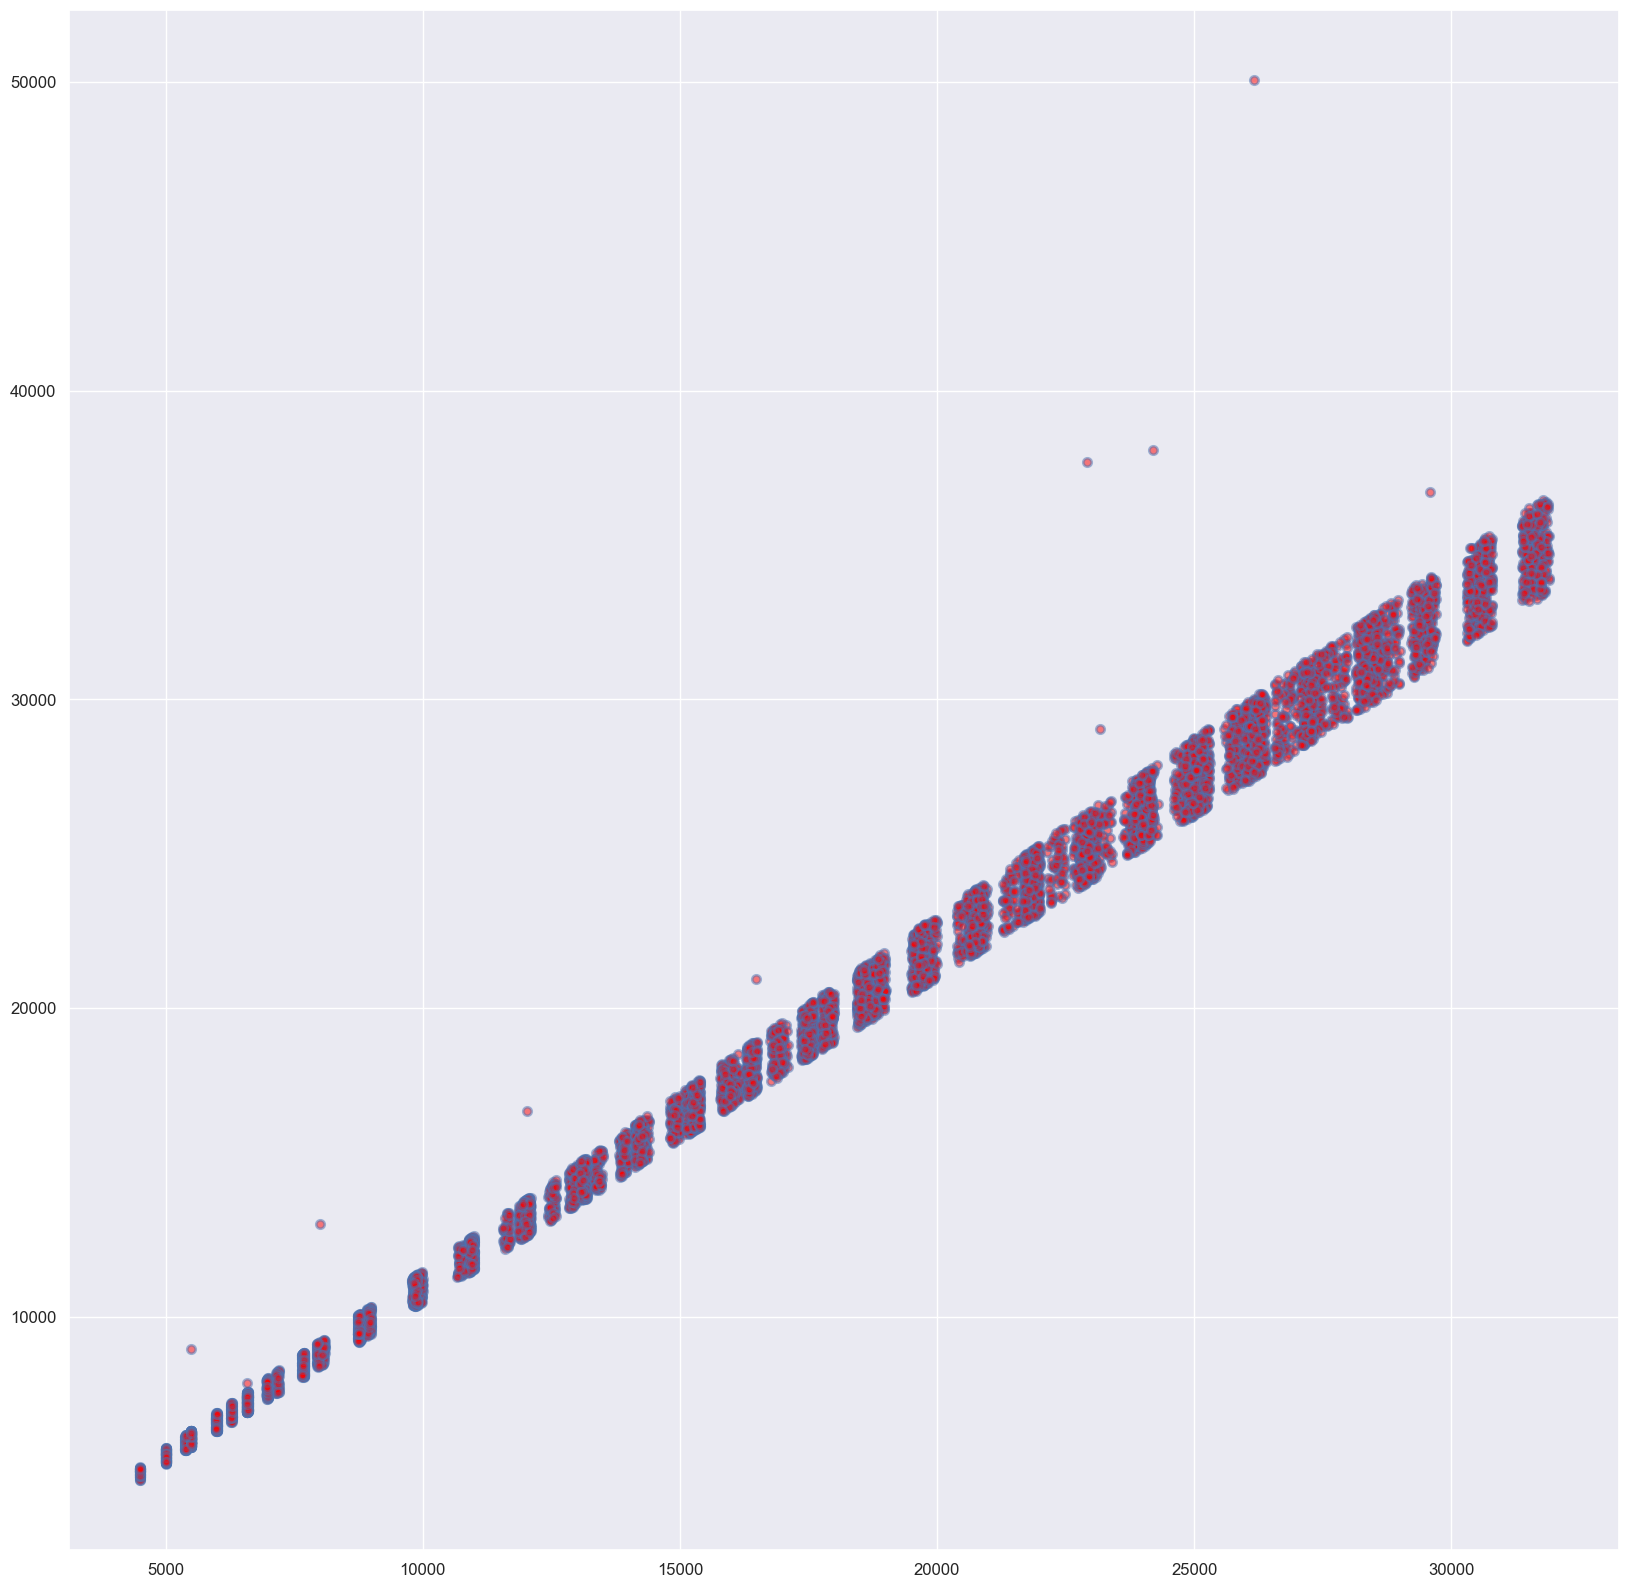

In [24]:
x = vehicle_data["selling_price"][:10000]
y = vehicle_data["proposed_purchase_price"][:10000]

plt.scatter(x, y, color="red", alpha=0.5, edgecolors="b", linewidths=2) #to check how sparse data are, identify outliers, etc ...
plt.show()

In [25]:
vehicle_data.groupby("manufacturer")["selling_price"].max()

manufacturer
Audi          31899.85
BMW           31899.82
Chevrolet     31899.95
Ford          31899.40
Honda         31899.54
Hyundai       31899.89
Mercedes      31898.80
Nissan        31899.99
Toyota        31899.00
Volkswagen    31899.92
Name: selling_price, dtype: float64

In [26]:
vehicle_data.groupby("manufacturer")[["selling_price", "proposed_purchase_price"]].sum()

,selling_price,proposed_purchase_price
manufacturer,,
Audi,8.889681e+08,9.778801e+08
BMW,8.828390e+08,9.712355e+08
Chevrolet,8.892914e+08,9.782520e+08
Ford,8.832898e+08,9.718546e+08
Honda,8.850742e+08,9.736768e+08
Hyundai,8.791838e+08,9.671245e+08
Mercedes,8.822122e+08,9.705080e+08
Nissan,8.791842e+08,9.671946e+08
Toyota,8.779599e+08,9.658786e+08


In [27]:
vehicle_data.groupby(["manufacturer", "fuel_type"])[["selling_price", "proposed_purchase_price"]].sum()

selling_price  proposed_purchase_price
manufacturer fuel_type                                        
Audi         biodiesel   1.295195e+08             1.424067e+08
             diesel      1.245009e+08             1.369678e+08
             electric    1.301790e+08             1.432155e+08
             ethanol     1.285455e+08             1.414753e+08
             gasoline    1.273436e+08             1.400521e+08
...                               ...                      ...
Volkswagen   electric    1.247112e+08             1.371063e+08
             ethanol     1.272470e+08             1.399461e+08
             gasoline    1.219953e+08             1.341803e+08
             hybrid      1.261741e+08             1.387811e+08
             hydrogen    1.241369e+08             1.365044e+08

[70 rows x 2 columns]

In [28]:
vehicle_data.groupby(["manufacturer", "fuel_type"]).agg({
    "seating_capacity": ["min", "max", "mean", "std", "first", "last"],
    "proposed_purchase_price": ["min", "max", "mean", "std", "first", "last"],
    "transmission": ["count", "first", "last"]
})

seating_capacity                                     \
                                    min max      mean       std first last   
manufacturer fuel_type                                                       
Audi         biodiesel                2  10  6.030683  2.583734     7   10   
             diesel                   2  10  5.960991  2.594637     4    3   
             electric                 2  10  5.999316  2.606017     5    8   
             ethanol                  2  10  6.021018  2.595082     5    4   
             gasoline                 2  10  6.022992  2.588995     3   10   
...                                 ...  ..       ...       ...   ...  ...   
Volkswagen   electric                 2  10  6.017795  2.587015     3    5   
             ethanol                  2  10  6.016860  2.559153    10    6   
             gasoline                 2  10  5.999712  2.557221     6   10   
             hybrid                   2  10  6.048188  2.587311     9    4   
             hydrogen                 2  10  5.945259  2.587737     5   10   

                       proposed_purchase_price                          \
                                           min       max          mean   
manufacturer fuel_type                                                   
Audi         biodiesel                 4736.81  36472.44  19419.983308   
             diesel                    4759.93  36587.28  19288.524909   
             electric                  4752.39  36534.82  19594.410101   
             ethanol                   4733.15  36563.31  19562.408939   
             gasoline                  4742.73  36465.82  19397.796269   
...                                        ...       ...           ...   
Volkswagen   electric                  4737.52  36571.09  19210.633401   
             ethanol                   4748.62  36647.96  19340.262493   
             gasoline                  4729.39  36579.35  19317.637783   
             hybrid                    4735.57  36553.91  19497.197903   
             hydrogen                  4732.45  36568.96  19612.699871   

                                                        transmission  \
                                std     first      last        count   
manufacturer fuel_type                                                 
Audi         biodiesel  8264.039104  18101.34  22237.20         7333   
             diesel     8291.856203  12151.97  18965.99         7101   
             electric   8280.624358  23963.87   8379.27         7309   
             ethanol    8444.611742   6811.80  25818.67         7232   
             gasoline   8339.056098  21961.32  32584.21         7220   
...                             ...       ...       ...          ...   
Volkswagen   electric   8377.062254  28967.85  26999.56         7137   
             ethanol    8388.682805  10735.82  27026.55         7236   
             gasoline   8321.031428   6705.76   7482.59         6946   
             hybrid     8324.470678  24582.32  28365.35         7118   
             hydrogen   8427.419498  27316.48  23699.86         6960   

                                              
                            first       last  
manufacturer fuel_type                        
Audi         biodiesel  automatic     manual  
             diesel     automatic     manual  
             electric   automatic     manual  
             ethanol    automatic  automatic  
             gasoline   automatic  automatic  
...                           ...        ...  
Volkswagen   electric   automatic     manual  
             ethanol       manual     manual  
             gasoline      manual     manual  
             hybrid     automatic     manual  
             hydrogen      manual     manual  

[70 rows x 15 columns]

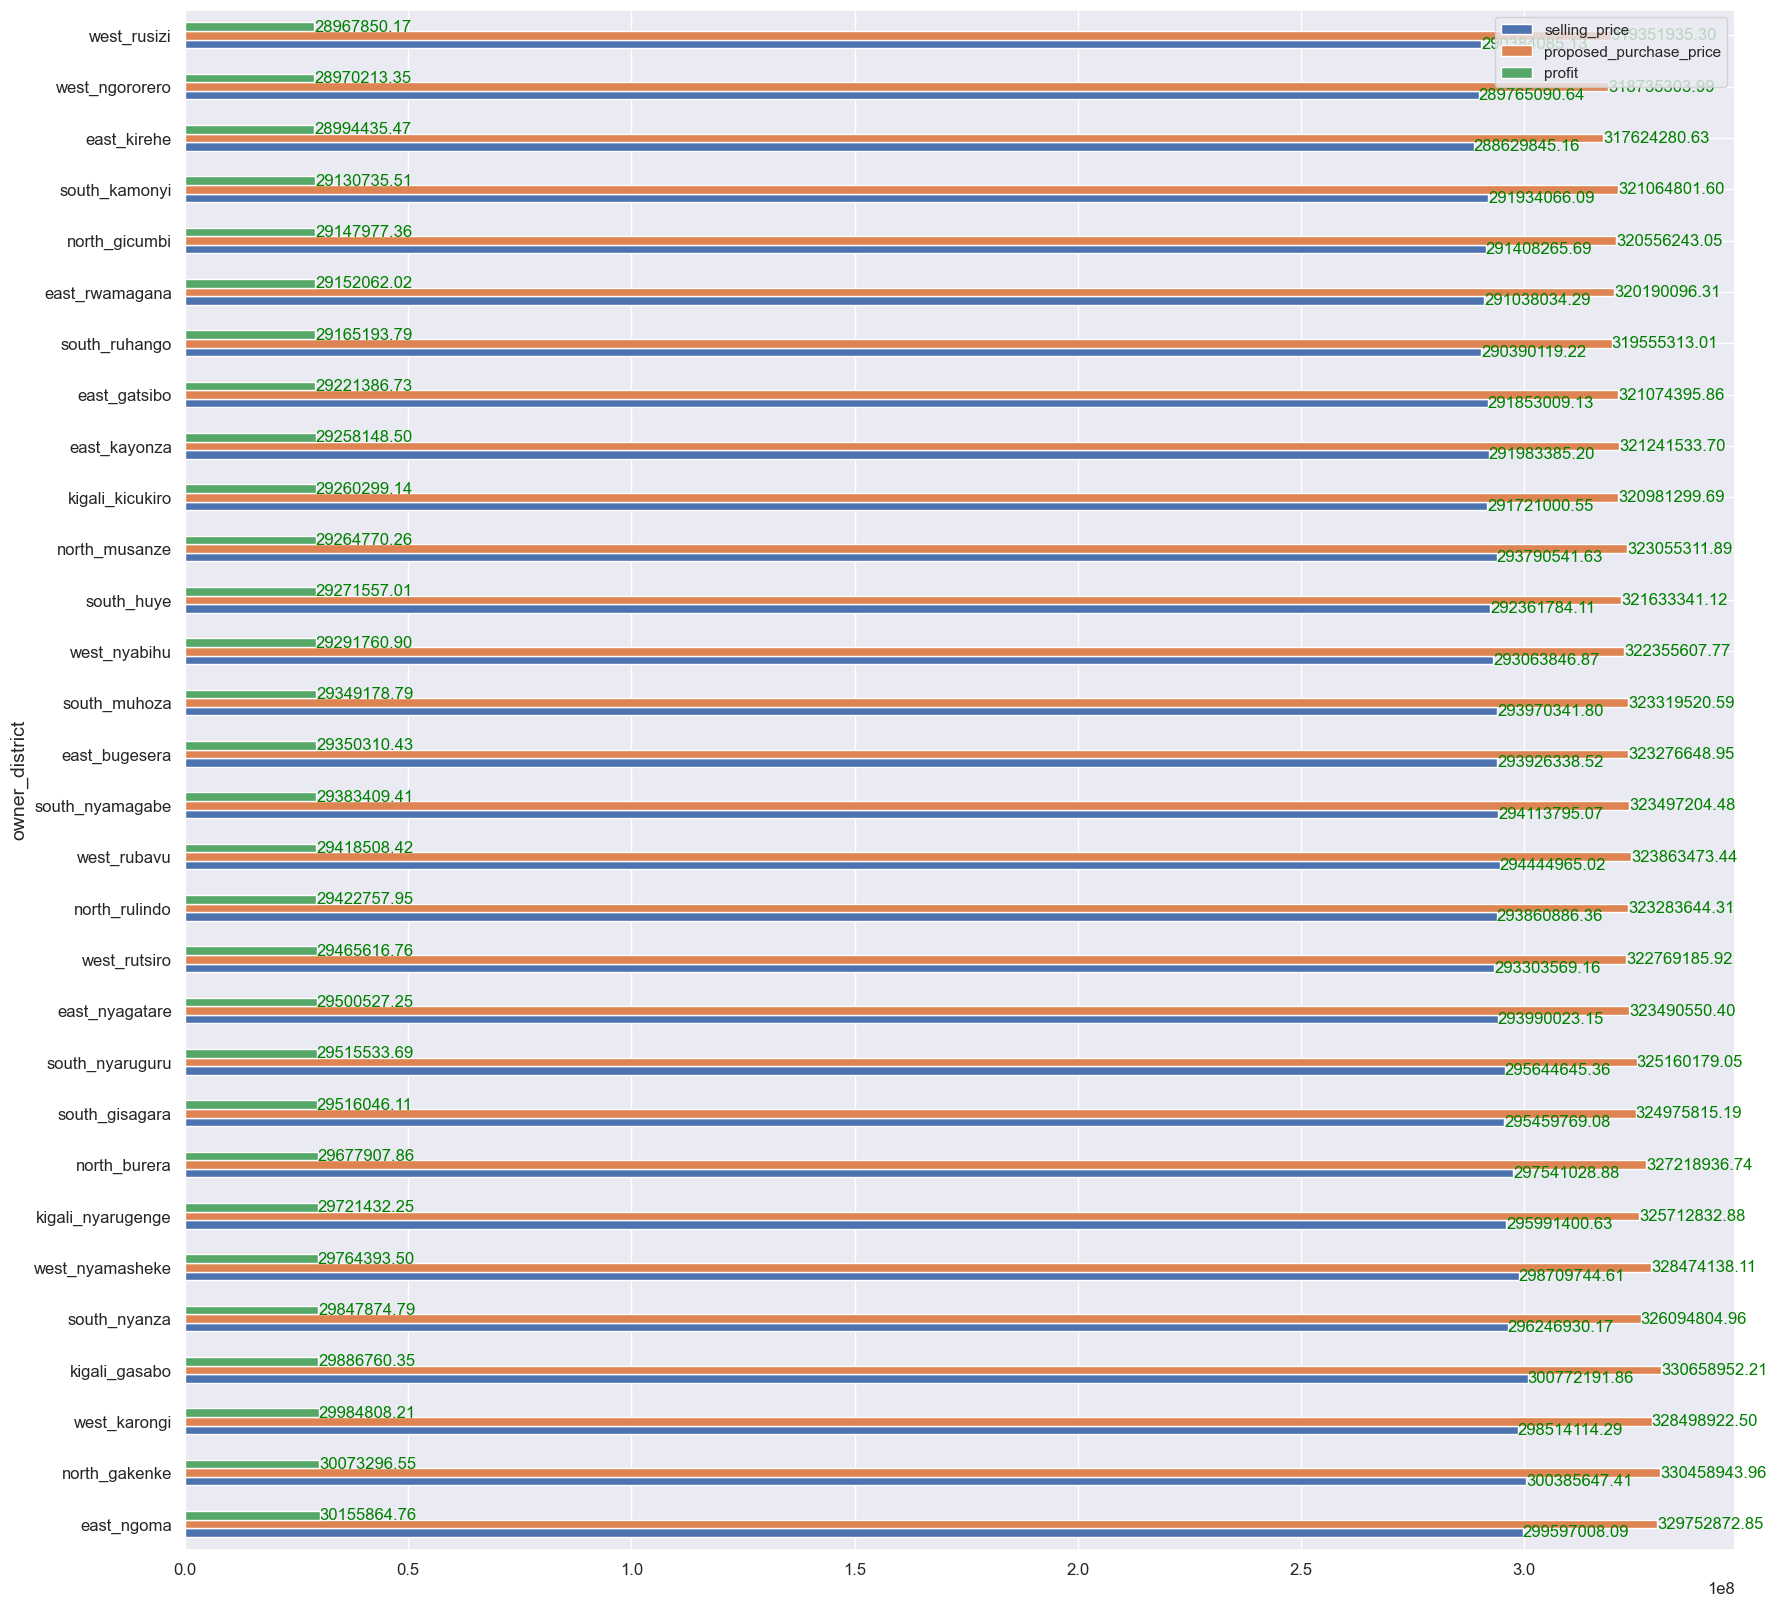

In [29]:
mbdf = vehicle_data.groupby("owner_district")[["selling_price", "proposed_purchase_price"]].sum()
mbdf["profit"] = mbdf["proposed_purchase_price"] - mbdf["selling_price"]
mbdf = mbdf.sort_values(by="profit", ascending=False)
plot3 = mbdf.plot(kind="barh")

for bars in plot3.containers:
    plot3.bar_label(bars, fmt="%.2f", color="green", fontsize=12)

plt.show()

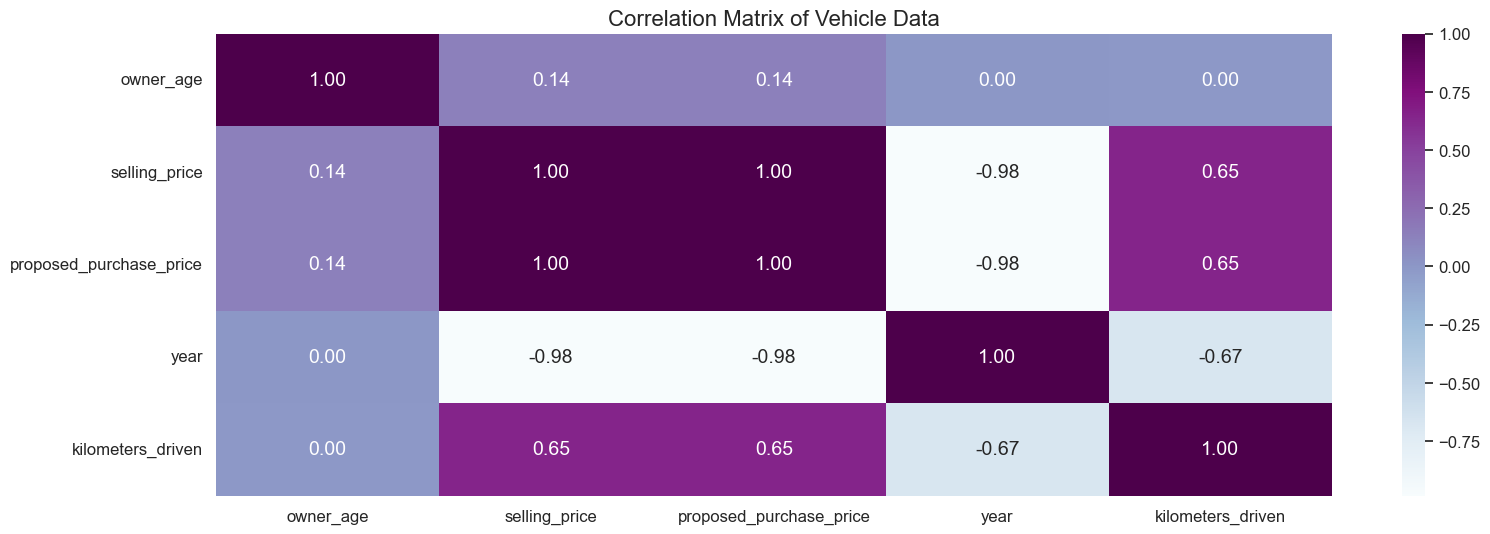

In [30]:
corr_matrix = vehicle_data[["owner_age", "selling_price", "proposed_purchase_price", "year", "kilometers_driven"]].corr()
plt.figure(figsize=(18, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="BuPu", cbar=True)
plt.title("Correlation Matrix of Vehicle Data")
plt.show()

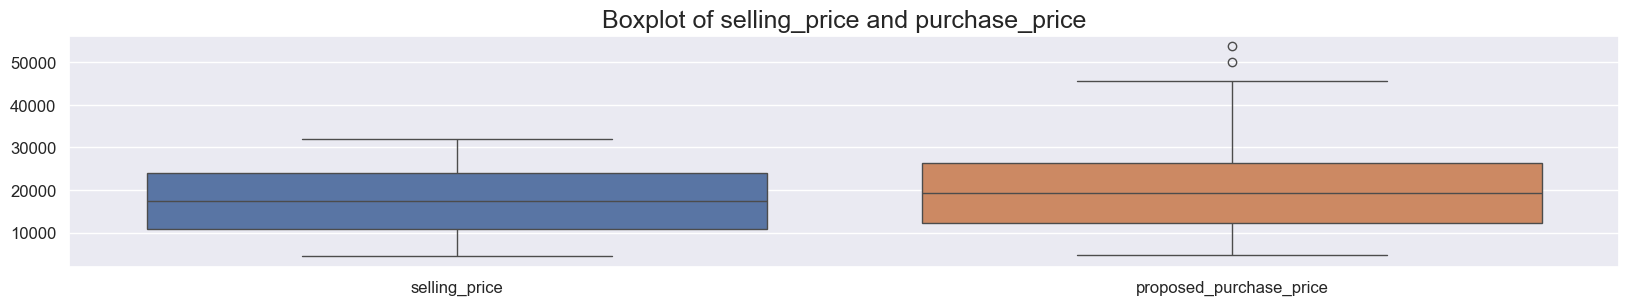

In [31]:
plt.figure(figsize=(20, 3))
sns.boxplot(data=vehicle_data[["selling_price", "proposed_purchase_price"]])
plt.title("Boxplot of selling_price and purchase_price", fontsize=18)
plt.show()

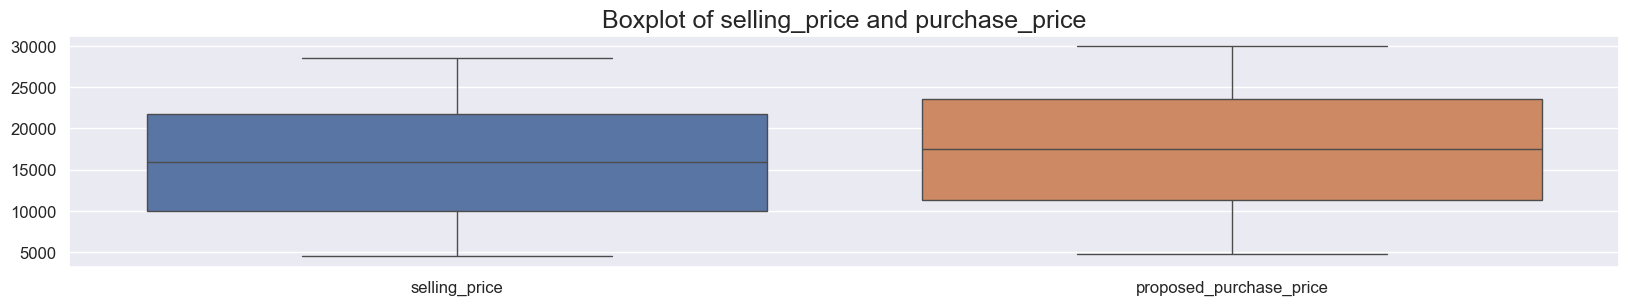

In [32]:
replica_without_outliers = vehicle_data[(vehicle_data["selling_price"] < 30000) & (vehicle_data["proposed_purchase_price"] < 30000)]
plt.figure(figsize=(20, 3))
sns.boxplot(data=replica_without_outliers[["selling_price", "proposed_purchase_price"]])
plt.title("Boxplot of selling_price and purchase_price", fontsize=18)
plt.show()

In [33]:
western_province_data_money = vehicle_data[vehicle_data['owner_district'].str.contains('west', case = False)]
money_from_west = western_province_data_money.groupby('manufacturer')[['selling_price']].sum()
df_money_from_west = pd.DataFrame(money_from_west)
df_money_from_west.head()

,selling_price
manufacturer,
Audi,2.106340e+08
BMW,2.059903e+08
Chevrolet,2.080041e+08
Ford,2.062773e+08
Honda,2.053956e+08


In [34]:
west_buyer_age = vehicle_data[vehicle_data['owner_district'].str.contains('west', na=False)]
p = west_buyer_age.groupby('owner_age')['selling_price'].sum()
p.idxmax()

53

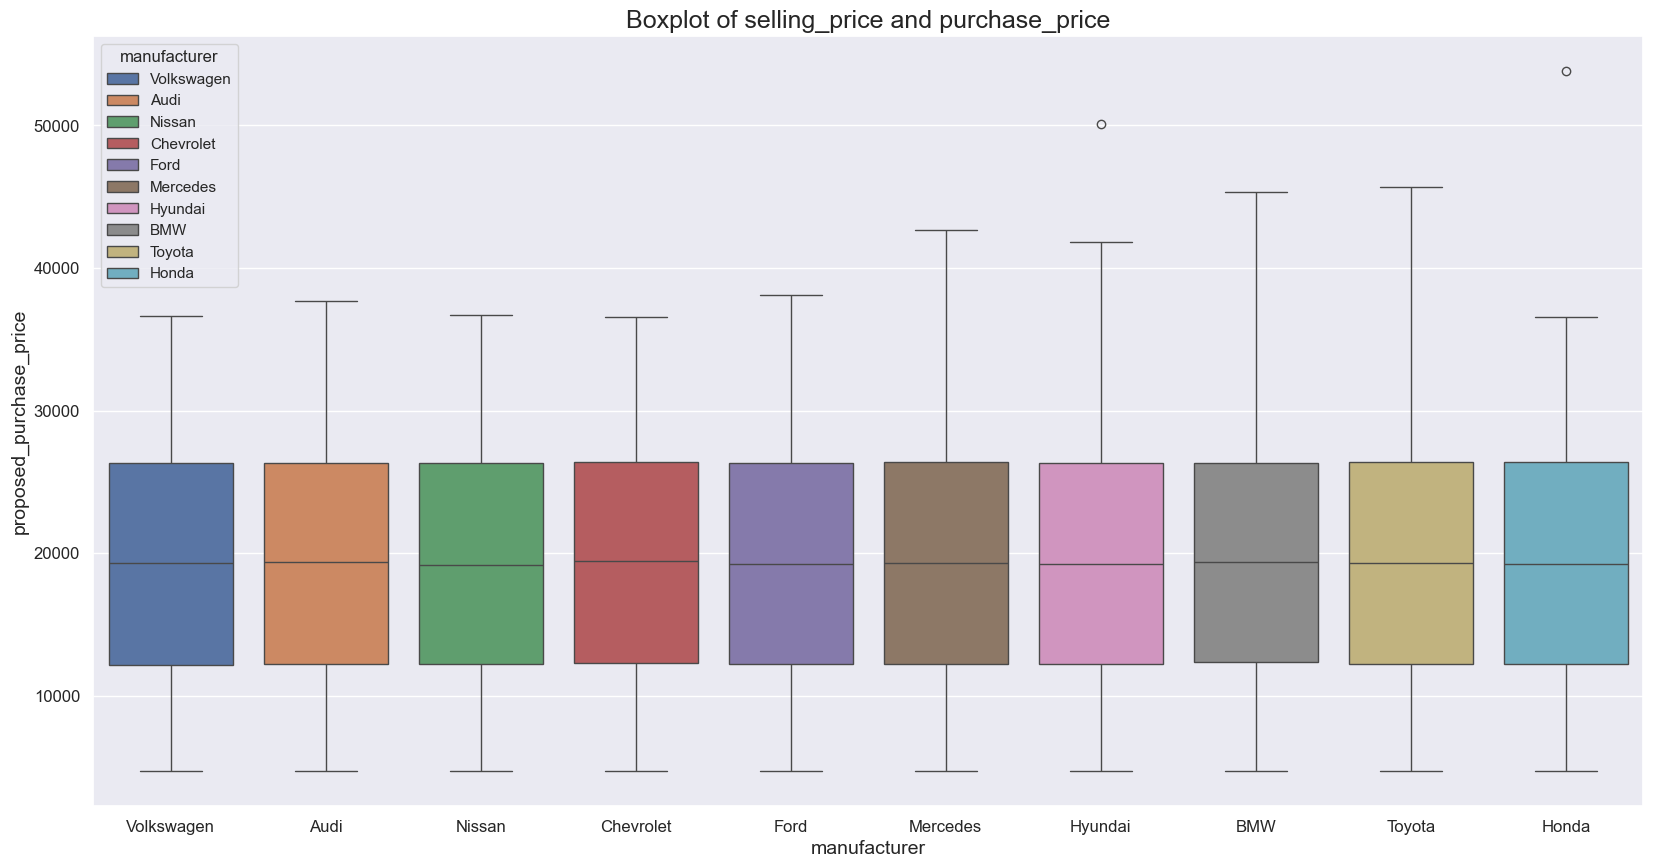

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=vehicle_data, x="manufacturer", y="proposed_purchase_price", hue="manufacturer", legend=True)
plt.title("Boxplot of selling_price and purchase_price", fontsize=18)
plt.show()

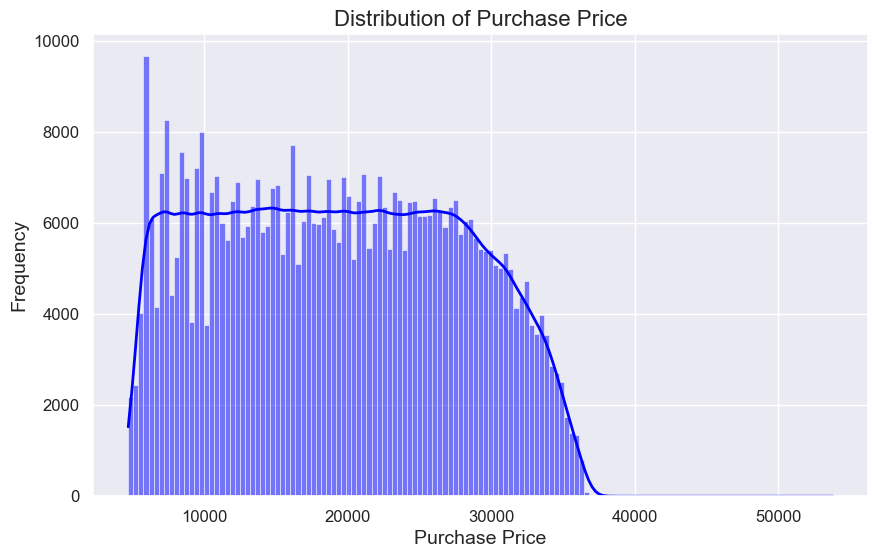

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(vehicle_data['proposed_purchase_price'], kde=True, color="blue")  # kde=True adds a Kernel Density Estimation
plt.title("Distribution of Purchase Price")
plt.xlabel("Purchase Price")
plt.ylabel("Frequency")
plt.show()

In [57]:
manufaturer_profit = vehicle_data.groupby("manufacturer")["selling_price"].sum()
sorted_profit = manufaturer_profit.sort_values(ascending=False)
sorted_profit.head()

manufacturer
Chevrolet    8.892914e+08
Audi         8.889681e+08
Honda        8.850742e+08
Ford         8.832898e+08
BMW          8.828390e+08
Name: selling_price, dtype: float64

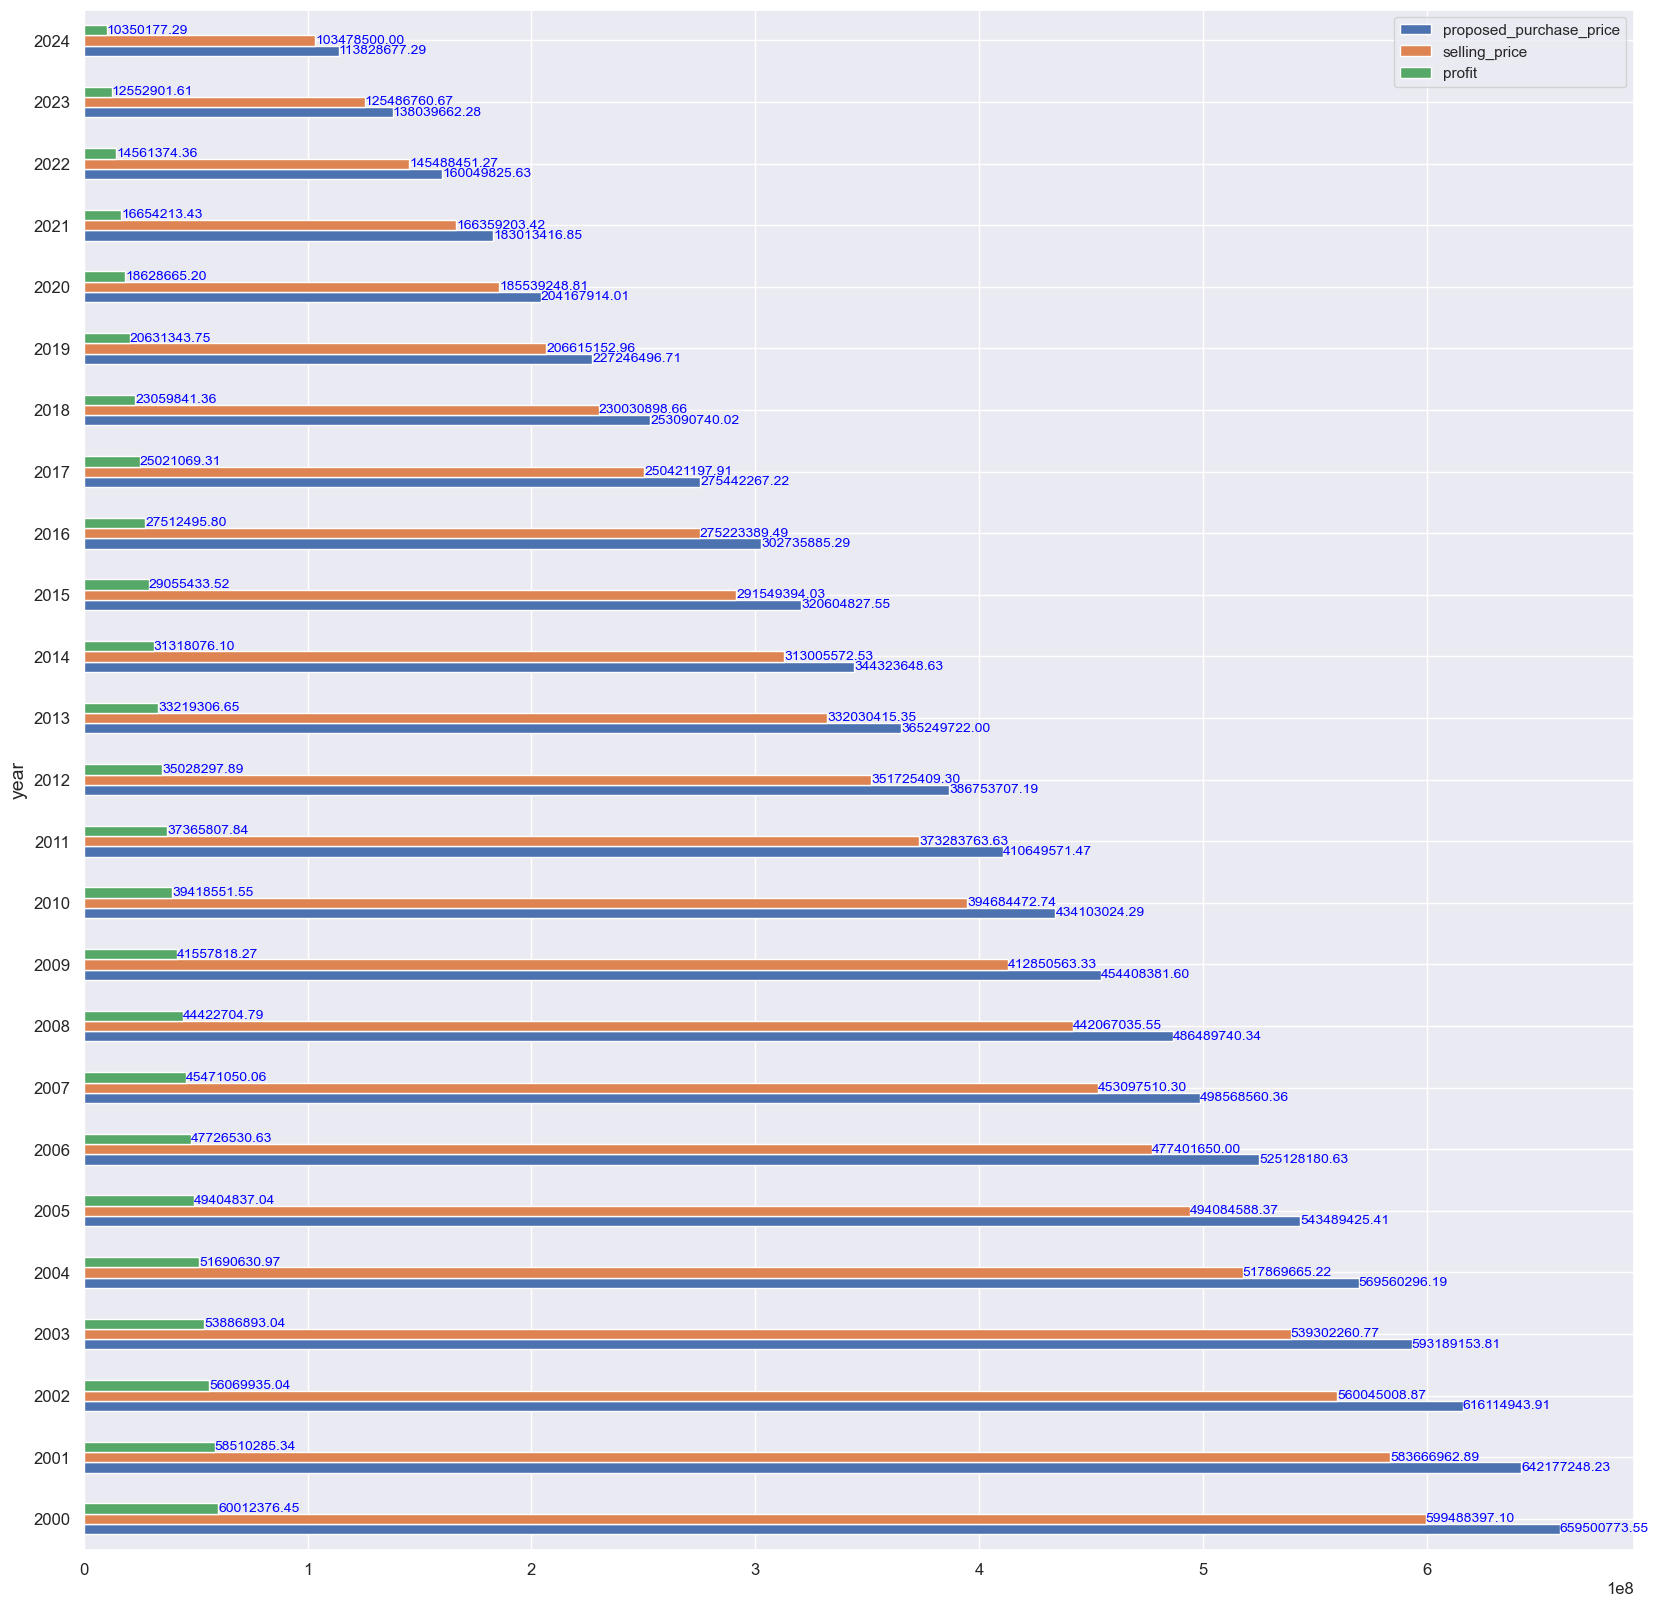

,proposed_purchase_price,selling_price,profit
year,,,
2000,6.595008e+08,5.994884e+08,60012376.45
2001,6.421772e+08,5.836670e+08,58510285.34
2002,6.161149e+08,5.600450e+08,56069935.04
2003,5.931892e+08,5.393023e+08,53886893.04
2004,5.695603e+08,5.178697e+08,51690630.97


In [65]:
year_profit = vehicle_data.groupby("year")[["proposed_purchase_price", "selling_price"]].sum()
year_profit["profit"] = year_profit["proposed_purchase_price"] - year_profit["selling_price"]
sorted_year_profit = year_profit.sort_values(ascending=False, by="profit")

year_plot = year_profit.plot(kind="barh")

for bars in year_plot.containers:
    year_plot.bar_label(bars, fmt="%.2f", color="blue", fontsize=10)

plt.show()

sorted_year_profit.head()

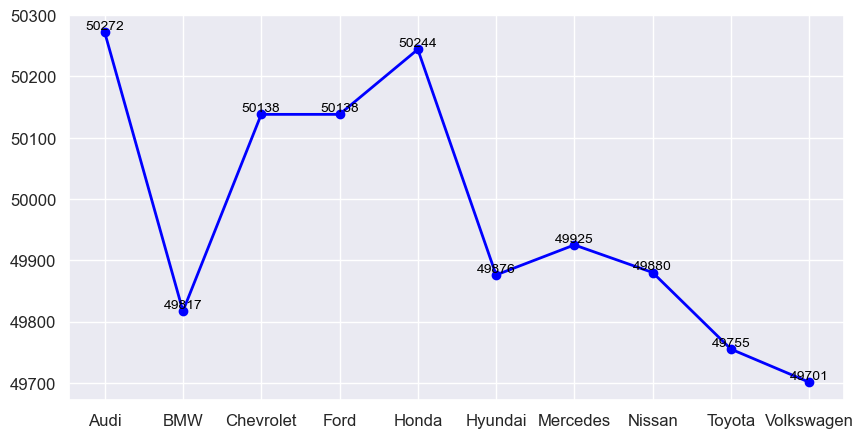

In [74]:
counts_man = vehicle_data["manufacturer"].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(counts_man.index, counts_man.values, marker="o", linestyle="-", color="blue")

for index, value in enumerate(counts_man.values):
    plt.text(counts_man.index[index], value, f'{value}', fontsize=10, ha='center', va='bottom', color='black')

plt.show()

In [81]:
def sample_function(a,b=[]):
    b.append(a)
    return b
x=sample_function(1)
y=sample_function(2,[])
z=sample_function(3)
k=sample_function(10, [])
print(x)
print(y)
print(z)
print(k)

[1, 3]
[2]
[1, 3]
[10]
